In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
5,female,group B,associate's degree,standard,none,71,83.0,78.0
6,female,group B,some college,standard,completed,88,95.0,92.0
7,male,group B,some college,free/reduced,none,40,43.0,39.0
8,male,group D,high school,free/reduced,completed,64,64.0,67.0
9,female,group B,high school,free/reduced,none,38,60.0,50.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   992 non-null    object 
 6   reading score                994 non-null    float64
 7   writing score                991 non-null    float64
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [6]:
gender_map = {"male" : 1, "female" : 0}
lunch_map = {"standard" : 1, "free/reduced" : 0}
df['gender'] = df['gender'].map(gender_map)
df['lunch'] = df['lunch'].map(lunch_map)


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,none,72,72.0,74.0
1,0,group C,some college,1,completed,69,90.0,88.0
2,0,group B,master's degree,1,none,90,95.0,93.0
3,1,group A,associate's degree,0,none,47,57.0,44.0
4,1,group C,some college,1,none,76,78.0,75.0


In [8]:
df['math score'].unique()


array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [9]:
df['math score'] = df['math score'].replace('?', float('nan'))


In [10]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [11]:
df['math score'] = df['math score'].astype(float)

In [12]:
df['math score'].fillna(df['math score'].mean(skipna=True), inplace=True)

In [13]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [14]:
df['reading score'].unique()

array([ 72.,  90.,  95.,  57.,  78.,  83.,  43.,  64.,  60.,  54.,  52.,
        81.,  53.,  75.,  89.,  32.,  22.,  12.,  13.,  14.,   9.,   8.,
         7.,   6.,   4.,   3.,   5.,  34.,  11.,  nan,  56.,  61.,  73.,
        58.,  65.,  71.,  74.,  84.,  55.,  69.,  44.,  41.,  85.,  59.,
        17.,  39.,  80.,  37.,  63.,  51.,  49.,  26.,  68.,  45.,  47.,
        70.,  86.,  79.,  66.,  67.,  91., 100.,  76.,  77.,  82.,  92.,
        93.,  62.,  88.,  50.,  28.,  42.,  87.,  48.,  46.,  23.,  38.,
        94.,  97.,  99.,  31.,  96.,  24.,  29.,  40.])

In [15]:
df['reading score'].fillna(df['reading score'].mean(skipna=True), inplace=True)
df['writing score'].fillna(df['writing score'].mean(skipna=True), inplace=True)

In [16]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,1,none,72.0,72.0,74.0
1,0,group C,some college,1,completed,69.0,90.0,88.0
2,0,group B,master's degree,1,none,90.0,95.0,93.0
3,1,group A,associate's degree,0,none,47.0,57.0,44.0
4,1,group C,some college,1,none,76.0,78.0,75.0
5,0,group B,associate's degree,1,none,71.0,83.0,78.0
6,0,group B,some college,1,completed,88.0,95.0,92.0
7,1,group B,some college,0,none,40.0,43.0,39.0
8,1,group D,high school,0,completed,64.0,64.0,67.0
9,0,group B,high school,0,none,38.0,60.0,50.0


<Axes: ylabel='writing score'>

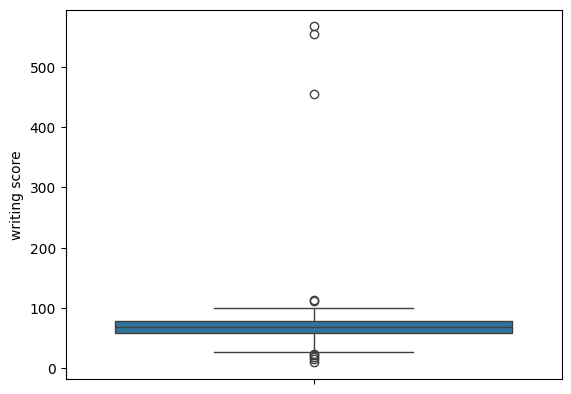

In [18]:
sns.boxplot(y="writing score", data=df)

<Axes: xlabel='reading score', ylabel='count'>

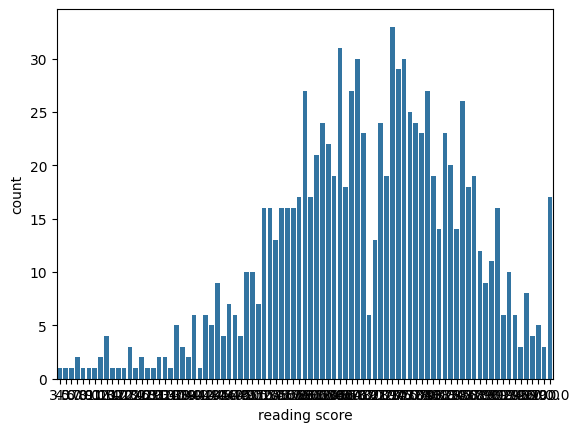

In [19]:
sns.countplot(x="reading score", data=df)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

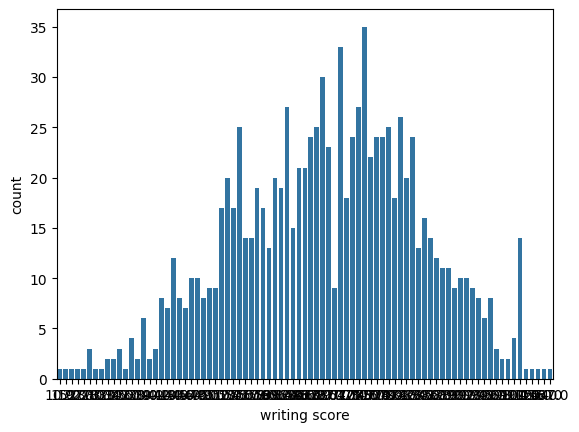

In [20]:
sns.countplot(x="writing score", data=df)
plt.xticks(range(0, df['writing score'].max() + 1, 100))
plt.xticks(rotation=90)
plt.show()


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


In [ ]:
df = remove_outliers(df, 'writing score')

<Axes: ylabel='writing score'>

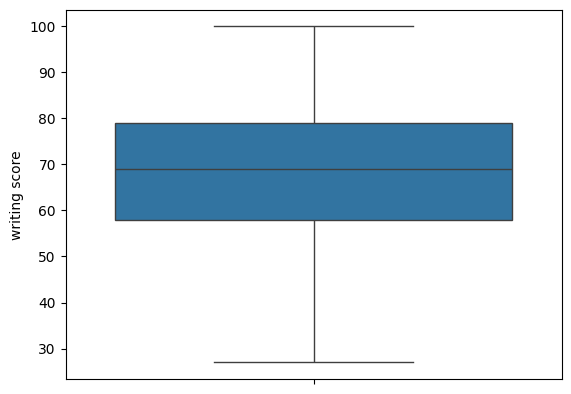

In [ ]:
sns.boxplot(y="writing score", data=df)

In [ ]:
df = remove_outliers(df, 'reading score')

In [ ]:
df = remove_outliers(df, 'math score')

<Axes: xlabel='reading score', ylabel='count'>

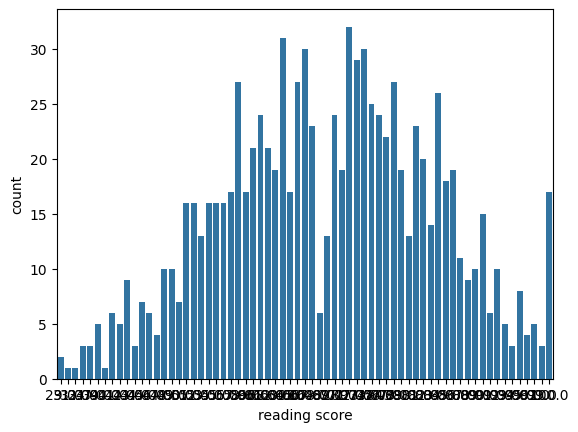

In [ ]:
sns.countplot(x="reading score", data=df)


In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer

# Z-score normalization
scaler = StandardScaler()
df['math_score_zscore'] = scaler.fit_transform(df[['math score']].dropna())

# Min-Max normalization
min_max_scaler = MinMaxScaler()
df['math_score_minmax'] = min_max_scaler.fit_transform(df[['math score']].dropna())

# Binning and discretization
# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
kbins_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Perform binning and discretization
df['math_score_bins'] = kbins_discretizer.fit_transform(df[['math score']].dropna())

c:\Users\Darshan Mahajan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [22]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_zscore,math_score_minmax,math_score_bins
0,0,group B,bachelor's degree,1,none,72.0,72.0,74.0,0.317570,0.380615,1.0
1,0,group C,some college,1,completed,69.0,90.0,88.0,0.149723,0.373522,1.0
2,0,group B,master's degree,1,none,90.0,95.0,93.0,1.324652,0.423168,2.0
3,1,group A,associate's degree,0,none,47.0,57.0,44.0,-1.081154,0.321513,1.0
4,1,group C,some college,1,none,76.0,78.0,75.0,0.541366,0.390071,1.0


<Axes: xlabel='math score', ylabel='count'>

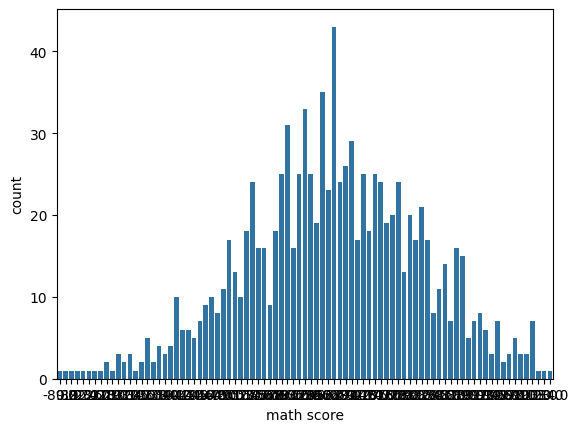

In [23]:
sns.countplot(x="math score", data=df)
